In [2]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter,date2num, WeekdayLocator,DayLocator,MONDAY
%matplotlib inline

# 1. Getting the Data

In [3]:
start_date = datetime.datetime(2020,1,1)
finish_date = datetime.datetime(2023,1,1)

In [4]:
tesla = yf.download("TSLA", start=start_date, end=finish_date)
ford = yf.download("F", start=start_date, end=finish_date)
gm = yf.download("GM", start=start_date, end=finish_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 2. Visualizing the Data

## Opening Price Each Day

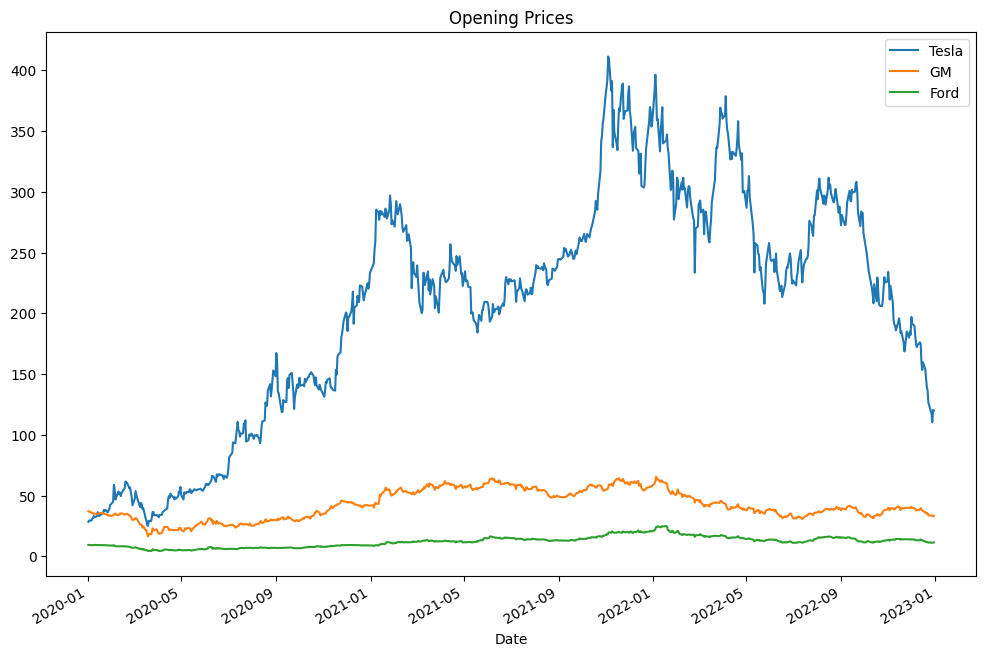

In [5]:


tesla['Open'].plot(label='Tesla', figsize=(12,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

## Volume of stock traded each day

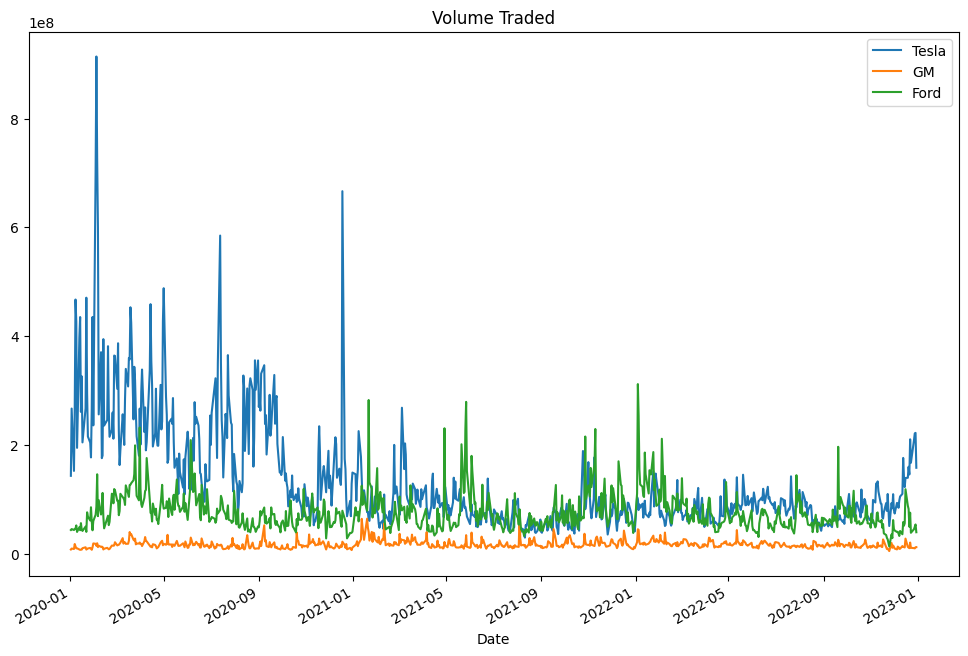

In [6]:
tesla['Volume'].plot(label='Tesla', figsize=(12,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

## Total Money Traded

In [7]:

# To do this we need to create a new column called Total Traded, which is the Open Price multiplied by the Volume Traded

tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']



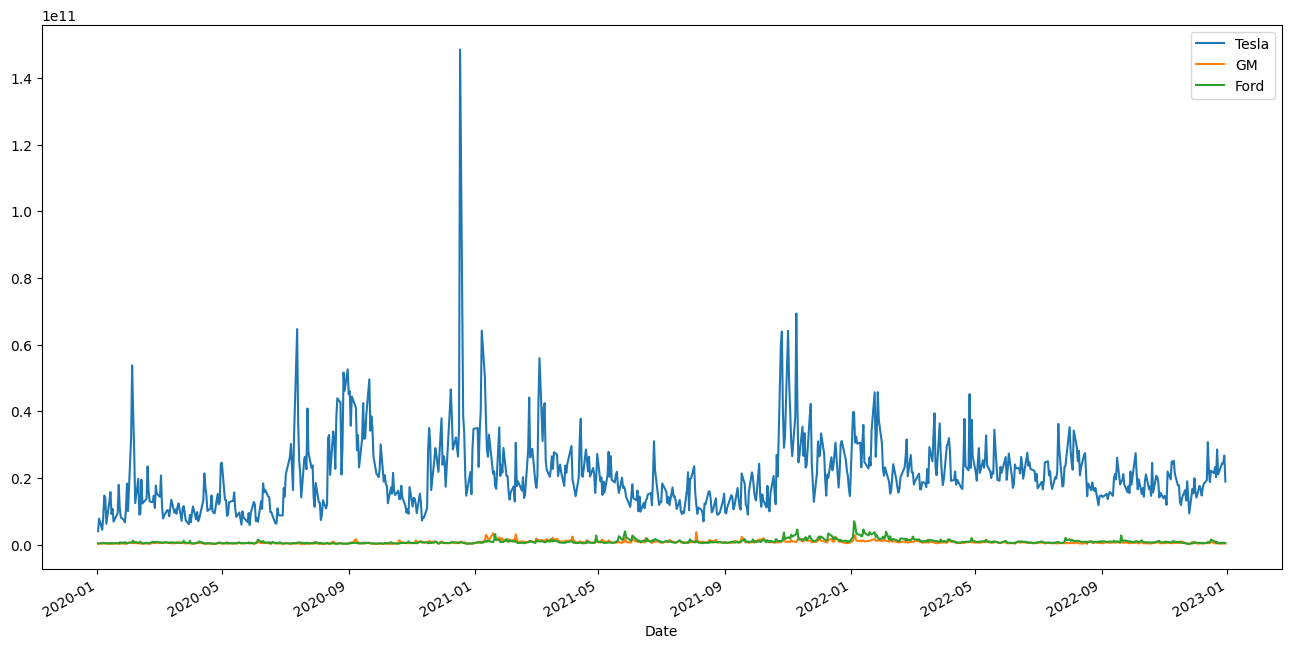

In [8]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

In [9]:
tesla['Total Traded'].argmax()

244

## Moving Averages

<Axes: xlabel='Date'>

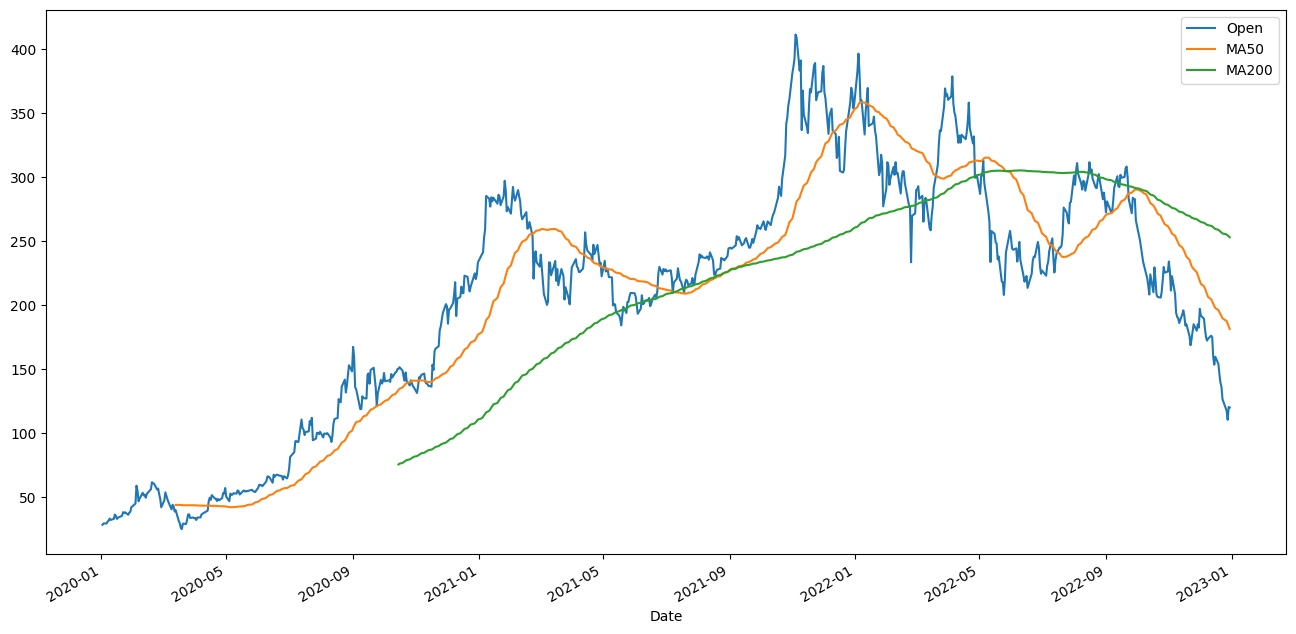

In [10]:
# Moving Averages Tesla

tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))

<Axes: xlabel='Date'>

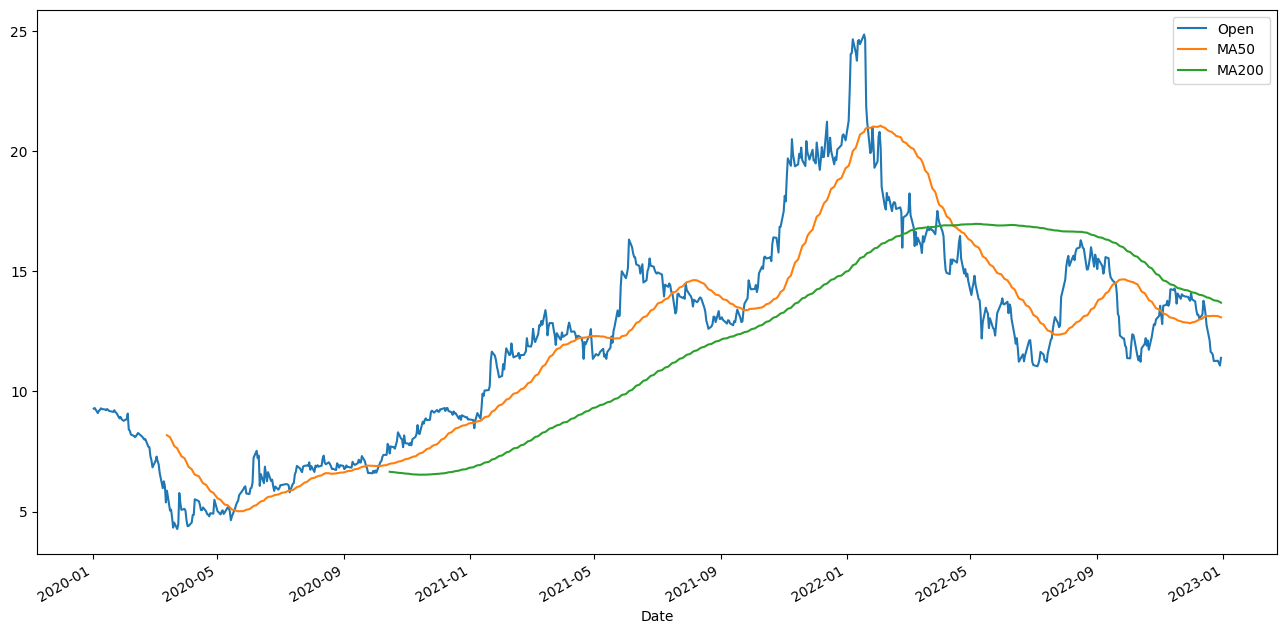

In [11]:
# Moving Averages Ford

ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()
ford[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))

<Axes: xlabel='Date'>

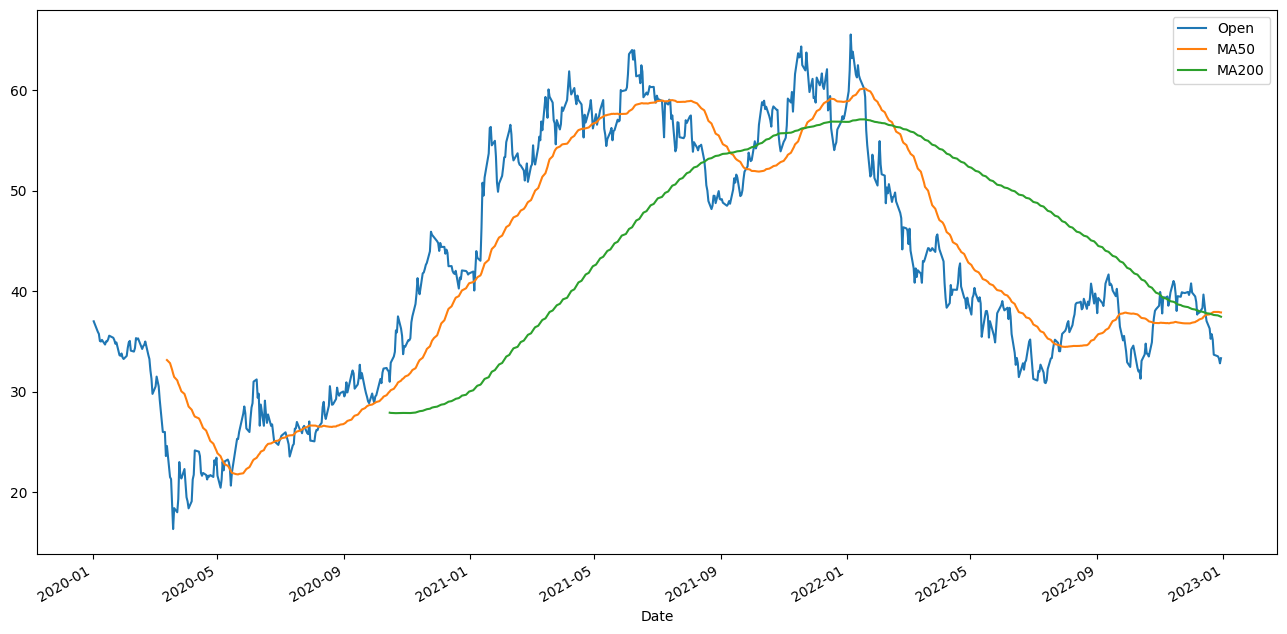

In [12]:
# Moving Averages GM

gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))

# 3. Relationships

In [13]:
from pandas.plotting import scatter_matrix

In [14]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2020-01-02,28.299999,37.000000,9.29
2020-01-03,29.366667,36.730000,9.31
2020-01-06,29.364668,35.950001,9.10
2020-01-07,30.760000,35.750000,9.20
2020-01-08,31.580000,35.040001,9.23


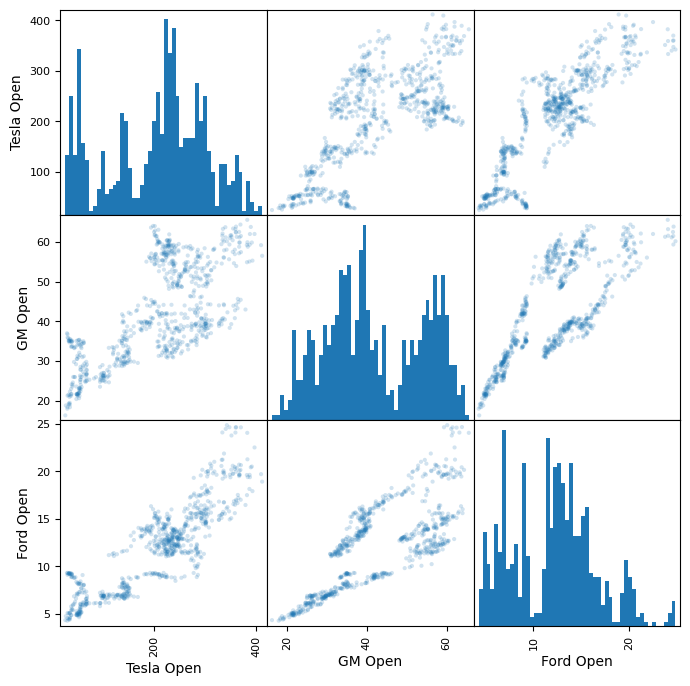

In [15]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

# 4. Basic Financial Analysis

## Daily Percent Change

In [16]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1
ford['returns'] = (ford['Close'] / ford['Close'].shift(1)) - 1
gm['returns'] = (gm['Close'] / gm['Close'].shift(1)) - 1

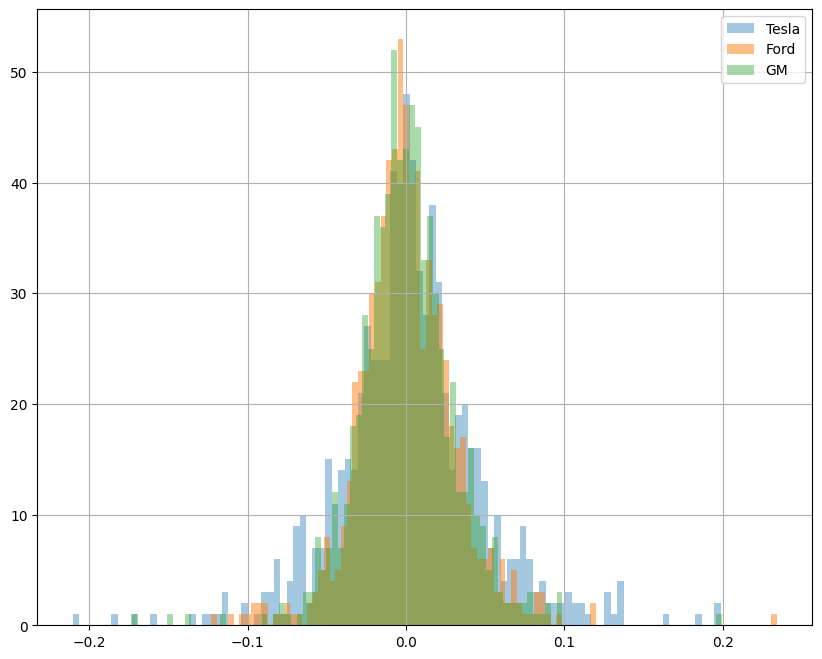

In [17]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
plt.legend();

## Kernel Density Information Plot

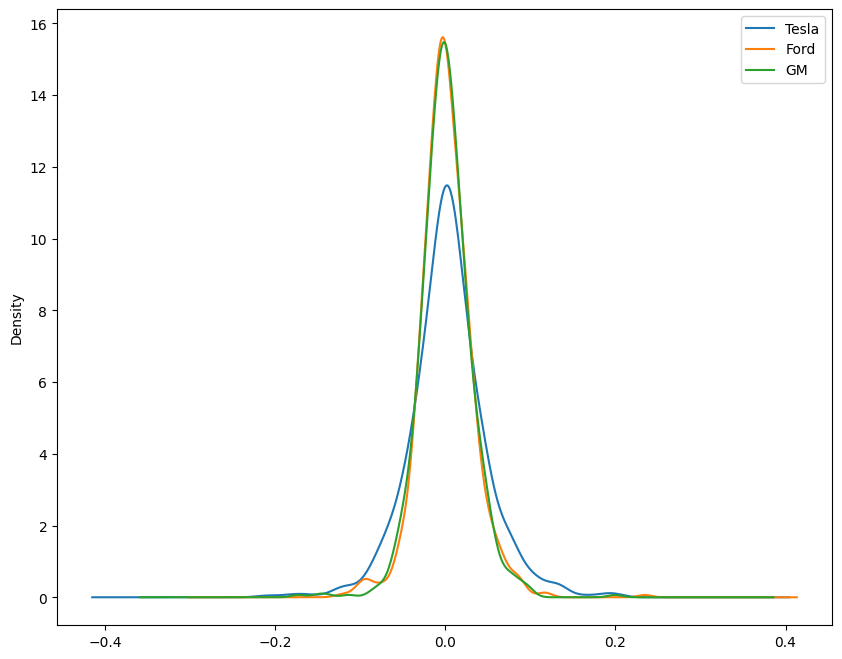

In [18]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(10,8))
ford['returns'].plot(kind='kde', label='Ford', figsize=(10,8))
gm['returns'].plot(kind='kde', label='GM', figsize=(10,8))
plt.legend();

## Box Plots to Compare Returns

<Axes: >

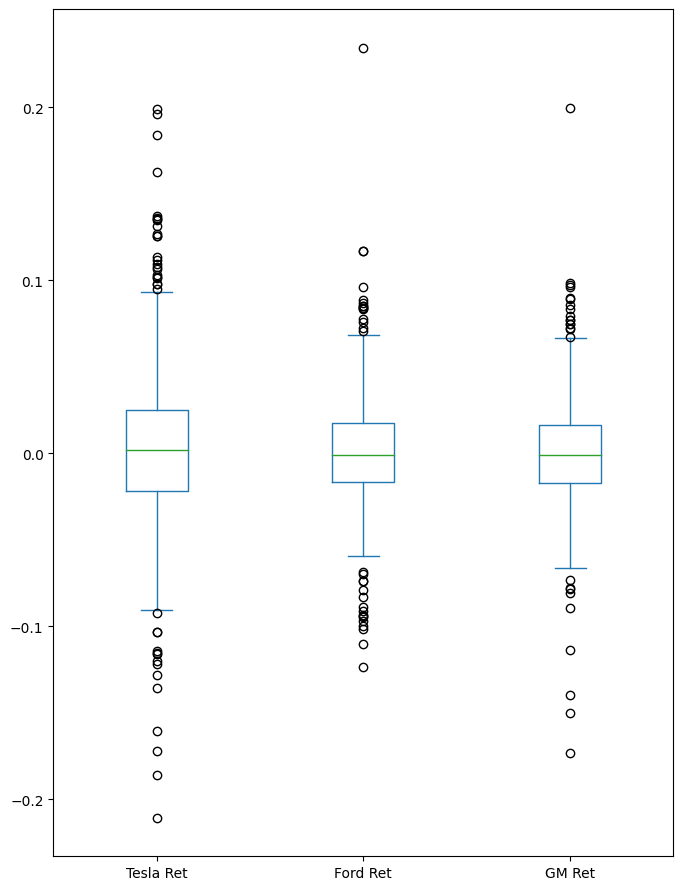

In [19]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM Ret']
box_df.plot(kind='box',figsize=(8,11))

## Comparing Return Between Stocks with a Scatter Matrix Plot

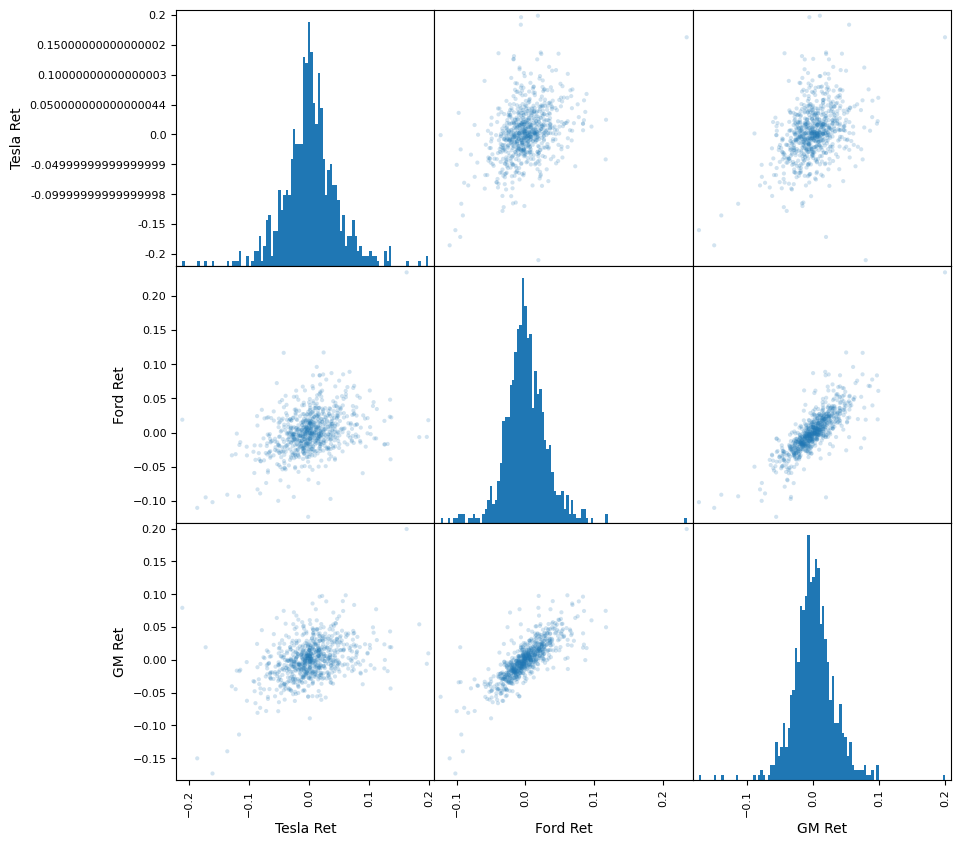

In [20]:
scatter_matrix(box_df,figsize=(10,10),alpha=0.2,hist_kwds={'bins':100});

## Comparison of GM and Ford Returns

<Axes: xlabel='GM Ret', ylabel='Ford Ret'>

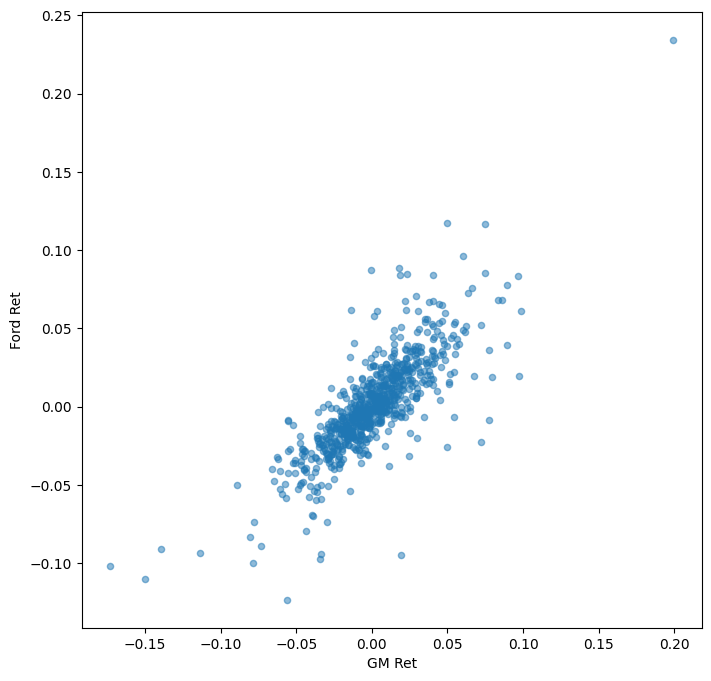

In [21]:
box_df.plot(kind='scatter',x='GM Ret',y='Ford Ret',alpha=0.5,figsize=(8,8))

## Cumulative Daily Returns

In [22]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

<Axes: xlabel='Date'>

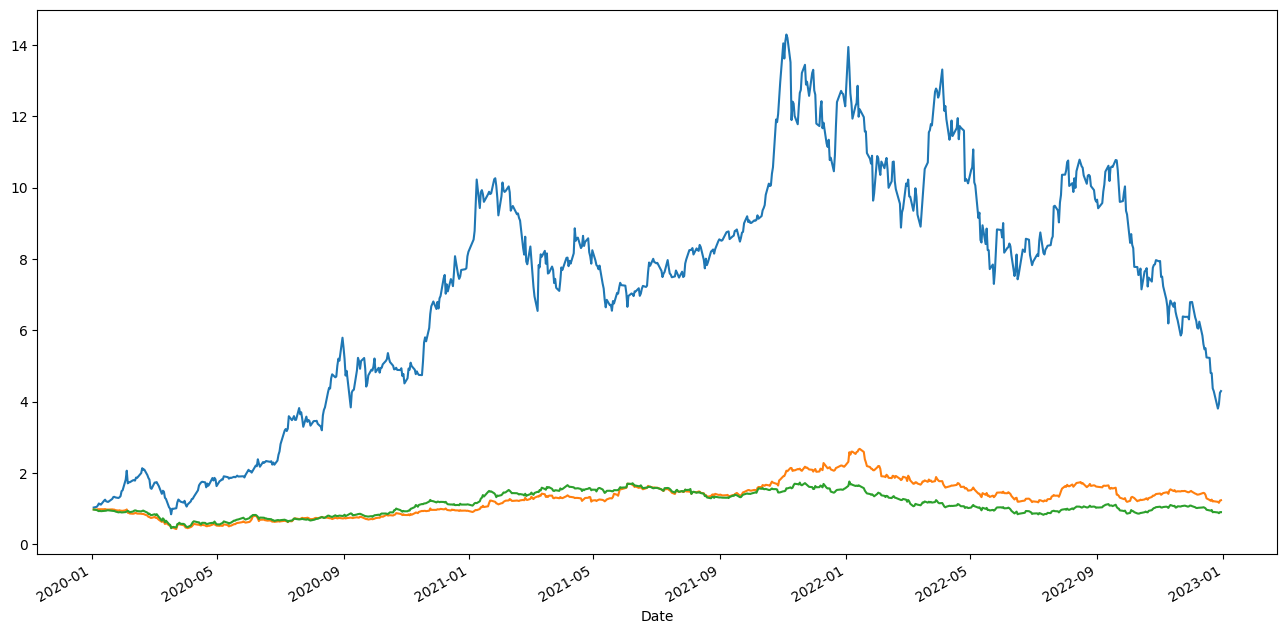

In [23]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')